In [82]:
import pandas as pd
import os
import numpy as np
import matplotlib as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
%matplotlib inline

In [83]:
pwd

'/Users/elenathornton'

In [84]:
dftest = pd.read_csv(r'/Users/elenathornton/pythonproject_csc2302/test.csv')
df = pd.read_csv(r'/Users/elenathornton/pythonproject_csc2302/train.csv')

In [85]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [87]:
#see which columns have missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
#frequency distribution of categorical variables
print(df['Credit_History'].value_counts())
print('Probability of loan approval based on credit history:')
print(df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()))

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Probability of loan approval based on credit history:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [89]:
print(df['Dependents'].value_counts())
print('Probability of loan approval based on number of dependents:')
print(df.pivot_table(values='Loan_Status',index=['Dependents'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()))

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Probability of loan approval based on number of dependents:
            Loan_Status
Dependents             
0              0.689855
1              0.647059
2              0.752475
3+             0.647059


In [90]:
print(df['Education'].value_counts())
print('Probability of loan approval based on education:')
print(df.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()))

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Probability of loan approval based on education:
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940


In [91]:
print(df['Gender'].value_counts())
print('Probability of loan approval based on gender:')
print(df.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()))

Male      489
Female    112
Name: Gender, dtype: int64
Probability of loan approval based on gender:
        Loan_Status
Gender             
Female     0.669643
Male       0.693252


In [92]:
print(df['Married'].value_counts())
print('Probability of loan approval based on marital status:')
print(df.pivot_table(values='Loan_Status',index=['Married'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()))

Yes    398
No     213
Name: Married, dtype: int64
Probability of loan approval based on marital status:
         Loan_Status
Married             
No          0.629108
Yes         0.716080


In [93]:
print(df['Property_Area'].value_counts())
print('Probability of loan approval based on property area:')
print(df.pivot_table(values='Loan_Status',index=['Property_Area'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()))

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Probability of loan approval based on property area:
               Loan_Status
Property_Area             
Rural             0.614525
Semiurban         0.768240
Urban             0.658416


In [94]:
print(df['Self_Employed'].value_counts())
print('Probability of loan approval based on self employment:')
print(df.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()))

No     500
Yes     82
Name: Self_Employed, dtype: int64
Probability of loan approval based on self employment:
               Loan_Status
Self_Employed             
No                0.686000
Yes               0.682927


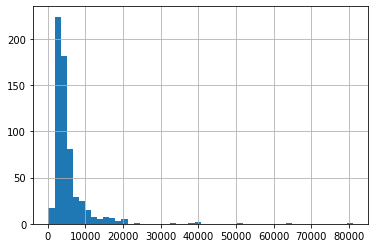

In [95]:
#analyzing continuous variables and looking for outliers
df['ApplicantIncome'].hist(bins=50)

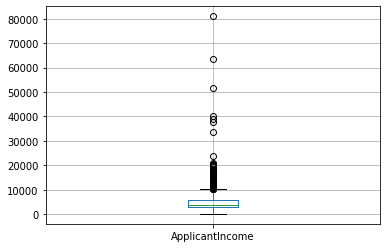

In [96]:
df.boxplot(column='ApplicantIncome')

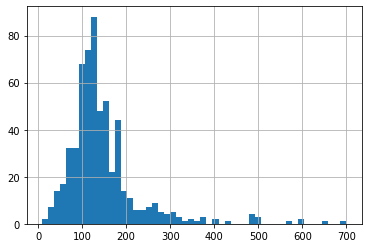

In [97]:
df['LoanAmount'].hist(bins=50)

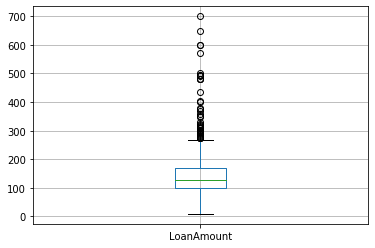

In [98]:
df.boxplot(column='LoanAmount')

In [99]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
#imputing missing values with mean for continuous variables and mode for categorical variables
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [101]:
#Creating total income column and normalizing TotalIncome and LoanAmount data with 
#logarithmic function to handle extreme values
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'] = np.log(df['LoanAmount'])

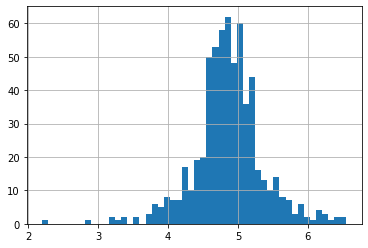

In [102]:
df['LoanAmount_log'].hist(bins=50)

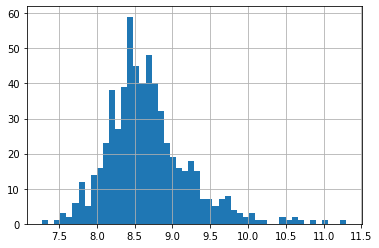

In [103]:
df['TotalIncome_log'].hist(bins=50)

In [104]:
cats = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed','Loan_Status']

for i in cats:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
TotalIncome_log      float64
LoanAmount_log       float64
dtype: object

In [105]:
#function for making a model and outputting performance
def model(modelType, dataFrame, variable, outcome):
    modelType.fit(dataFrame[variable], dataFrame[outcome])
    predictions = modelType.predict(dataFrame[variable])
    accuracy = metrics.accuracy_score(predictions, dataFrame[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    kf = KFold(5, True, 1)
    error = []
    for train, test in kf.split(dataFrame):
        train_variables = (dataFrame[variable].iloc[train,:])
        train_target = dataFrame[outcome].iloc[train]
        modelType.fit(train_variables, train_target)
        error.append(modelType.score(dataFrame[variable].iloc[test,:], dataFrame[outcome].iloc[test]))
   
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    modelType.fit(dataFrame[variable],dataFrame[outcome])

In [106]:
df['Type']='Train' 
dftest['Type']='Test'
dfcombined = pd.concat([df,dftest],axis=0, sort=True)

dfcombined.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            10
Education              0
Gender                11
LoanAmount             5
LoanAmount_log       367
Loan_Amount_Term       6
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         23
TotalIncome          367
TotalIncome_log      367
Type                   0
dtype: int64

In [107]:
ID_col = ['Loan_ID']
target = ["Loan_Status"]
combined_cats = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

#Imputing Missing values for test data
dfcombined['LoanAmount'].fillna(dfcombined['LoanAmount'].mean(), inplace=True)
dfcombined['LoanAmount_log'].fillna(dfcombined['LoanAmount_log'].mean(), inplace=True)
dfcombined['Loan_Amount_Term'].fillna(dfcombined['Loan_Amount_Term'].mean(), inplace=True)
dfcombined['ApplicantIncome'].fillna(dfcombined['ApplicantIncome'].mean(), inplace=True)
dfcombined['CoapplicantIncome'].fillna(dfcombined['CoapplicantIncome'].mean(), inplace=True)
dfcombined['Gender'].fillna(dfcombined['Gender'].mode()[0], inplace=True)
dfcombined['Married'].fillna(dfcombined['Married'].mode()[0], inplace=True)
dfcombined['Dependents'].fillna(dfcombined['Dependents'].mode()[0], inplace=True)
dfcombined['Loan_Amount_Term'].fillna(dfcombined['Loan_Amount_Term'].mode()[0], inplace=True)
dfcombined['Credit_History'].fillna(dfcombined['Credit_History'].mode()[0], inplace=True)

dfcombined['LoanAmount_log'] = np.log(dfcombined['LoanAmount_log'])
dfcombined['TotalIncome']=dfcombined['ApplicantIncome'] + dfcombined['CoapplicantIncome']
dfcombined['TotalIncome_log'] = np.log(dfcombined['TotalIncome'])

for i in combined_cats:
    le = LabelEncoder()
    dfcombined[i] = le.fit_transform(dfcombined[i].astype('str'))
    
train_modified=dfcombined[dfcombined['Type']=='Train']
test_modified=dfcombined[dfcombined['Type']=='Test']
train_modified["Loan_Status"] = le.fit_transform(train_modified["Loan_Status"].astype('str'))

predictors=['Credit_History','Education','LoanAmount']
x_train = train_modified[list(predictors)].values
y_train = train_modified["Loan_Status"].values
x_test=test_modified[list(predictors)].values
outcome_var = 'Loan_Status'

modelType = LogisticRegression(solver="lbfgs")
modelType.fit(x_train, y_train)
predicted= modelType.predict(x_test)

predicted = le.inverse_transform(predicted)
test_modified['Loan_Status']=predicted
outcome_var = 'Loan_Status'
model(modelType, df, predictors, outcome_var)
test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])

Accuracy : 80.945%
Cross-Validation Score : 80.944%


/Users/elenathornton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/elenathornton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
